# Hydrogen Atom

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pydeft as deft
import profess

Orbital-free density functional theory is able to find the energy of a Hydrogen atom exactly because there is no correlation and because the Weizsaecker kinetic energy functional is exact.

The energy of a Hydrogen atom is $-0.5$ Hartrees.

However, plane waves are not well-suited to the bare Coulomb potential, nor are periodic boundary conditions especially suitable for isolated atoms. This example explores these effects.

Fortunately, energy differences converge more quickly...

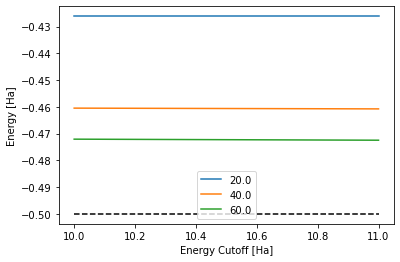

In [2]:
box_lengths = np.linspace(20,60,3)
energy_cutoffs = np.linspace(10,11,2)

def H_energy(length, cutoff):

    grid_shape = profess.System.get_shape(length*np.eye(3), cutoff, ['b','h'])
    system = profess.System(grid_shape)
    (system
        # set simulation box
        .set_box(length*np.eye(3))
        # add ions and electrons
        .add_coulomb_ions(1.0, np.zeros([1,3]))
        .distribute_electrons_uniformly(system.total_ion_charge())
        # add energy functionals
        .add_weizsaecker_functional()
        .add_ion_electron_functional()
    )
    system.minimize_energy()
    return system.energy('h')

# compute energies for the box lengths and energy cutoffs
data = np.empty([box_lengths.size, energy_cutoffs.size])
for i, length in enumerate(box_lengths):
    for j, cutoff in enumerate(energy_cutoffs):
        data[i,j] = H_energy(length, cutoff)

# create plot
for i in range(box_lengths.size):
    plt.plot(energy_cutoffs, data[i,:])
plt.plot(energy_cutoffs, -0.5*np.ones(energy_cutoffs.size), 'k--')
plt.xlabel('Energy Cutoff [Ha]')
plt.ylabel('Energy [Ha]')
plt.legend(box_lengths)
plt.show()